### About Dataset

Uncover the factors that lead to employee attrition and explore important questions such as:
- 'Show me a breakdown of distance from home by job role and attrition'
- 'Compare average monthly income by education and attrition'

This is a fictional dataset created by IBM data scientists.

### Education
| Code | Description        |
|------|--------------------|
| 1    | Below College      |
| 2    | College            |
| 3    | Bachelor           |
| 4    | Master             |
| 5    | Doctor             |

### Environment Satisfaction
| Code | Description |
|------|-------------|
| 1    | Low         |
| 2    | Medium      |
| 3    | High        |
| 4    | Very High   |

### Job Involvement
| Code | Description |
|------|-------------|
| 1    | Low         |
| 2    | Medium      |
| 3    | High        |
| 4    | Very High   |

### Job Satisfaction
| Code | Description |
|------|-------------|
| 1    | Low         |
| 2    | Medium      |
| 3    | High        |
| 4    | Very High   |

### Performance Rating
| Code | Description |
|------|-------------|
| 1    | Low         |
| 2    | Good        |
| 3    | Excellent   |
| 4    | Outstanding |

### Relationship Satisfaction
| Code | Description |
|------|-------------|
| 1    | Low         |
| 2    | Medium      |
| 3    | High        |
| 4    | Very High   |

### Work-Life Balance
| Code | Description |
|------|-------------|
| 1    | Bad         |
| 2    | Good        |
| 3    | Better      |
| 4    | Best        |

**Source**: [IBM HR Analytics Employee Attrition & Performance Dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Adjust width to fit the screen
pd.set_option('display.max_rows', None)  # Display all rows

In [2]:
df = pd.read_csv('Data\HR_Analytics.csv')
df1 = df.copy()
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df1['EmployeeNumber'].duplicated().any()

False

In [8]:
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns
numeric_columns = df1.select_dtypes(include=['number']).columns
# Calculate value counts for each non-numerical column
for column in non_numeric_columns:
    # print("Column:", column)
    print(df[column].value_counts())
    print()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Over18
Y    1470
Name:

In [9]:
df1.drop(columns=['Over18','EmployeeNumber','EmployeeCount','StandardHours'],inplace=True)

* Below columns are removed
> ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

In [10]:
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns
numeric_columns = df1.select_dtypes(include=['number']).columns

In [11]:
len(numeric_columns)

23

In [18]:
df1['Attrition_Bool'] = df1['Attrition'] == 'Yes'

In [39]:
df1[numeric_columns.to_list() + ['Attrition_Bool']].corr()['Attrition_Bool'].sort_values(key=lambda x: abs(x),ascending=False)

Attrition_Bool              1.000000
TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
MonthlyRate                 0.015170
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
Name: Attrition_Bool, dtype: float64

In [40]:
numeric_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [41]:
non_numeric_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

Below features to remove
* PerformanceRating, HourlyRate, PercentSalaryHike, MonthlyRate

In [44]:
quantitative_features = ['Age', 'DailyRate', 'DistanceFromHome',
                          'MonthlyIncome', 'NumCompaniesWorked',
                         'StockOptionLevel', 'TotalWorkingYears',
                         'TrainingTimesLastYear', 'YearsAtCompany',
                         'YearsInCurrentRole', 'YearsSinceLastPromotion',
                         'YearsWithCurrManager']
qualitative_features = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','EnvironmentSatisfaction','Education',
    'JobSatisfaction','JobInvolvement', 'JobLevel','JobRole', 'MaritalStatus', 'OverTime','WorkLifeBalance','RelationshipSatisfaction',
]

In [45]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


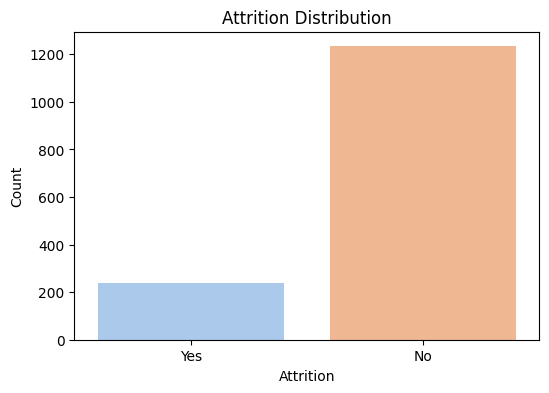

In [46]:
# Plot attrition distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df1, palette='pastel')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [48]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Bool'],
      dtype='object')

1 Correlation between Attrition and Age: -0.1592


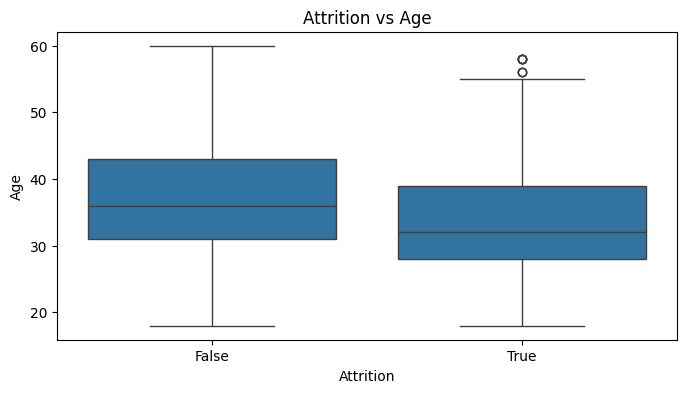

2 Correlation between Attrition and DailyRate: -0.0567


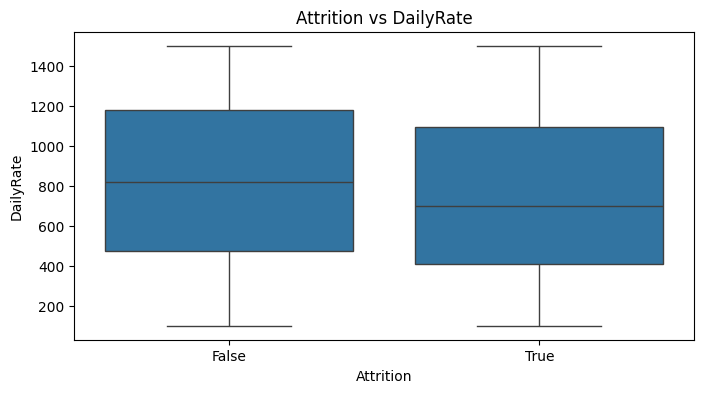

3 Correlation between Attrition and DistanceFromHome: 0.0779


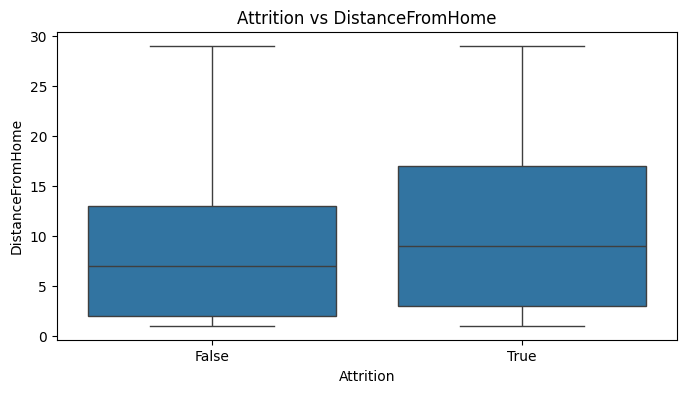

4 Correlation between Attrition and MonthlyIncome: -0.1598


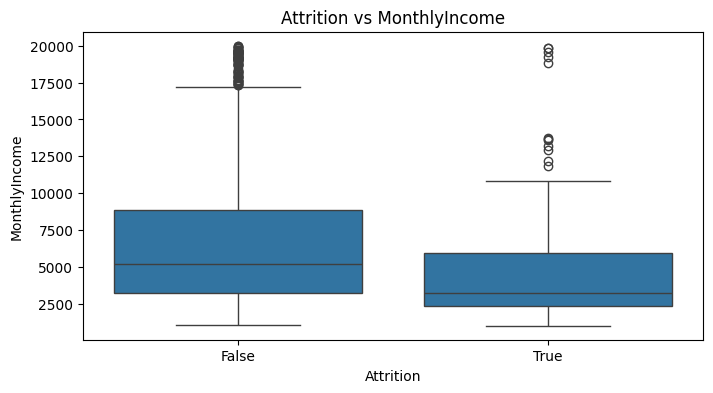

5 Correlation between Attrition and NumCompaniesWorked: 0.0435


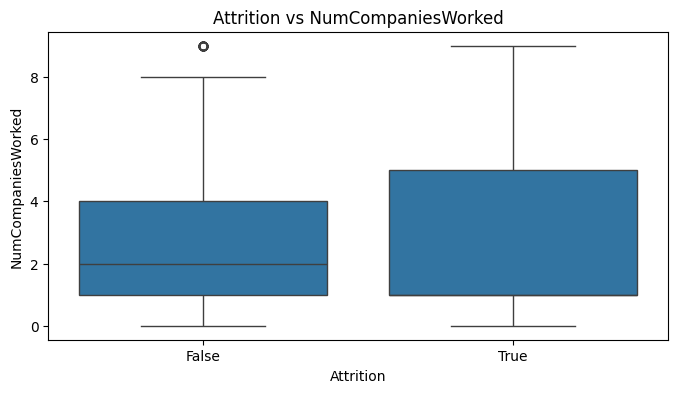

6 Correlation between Attrition and StockOptionLevel: -0.1371


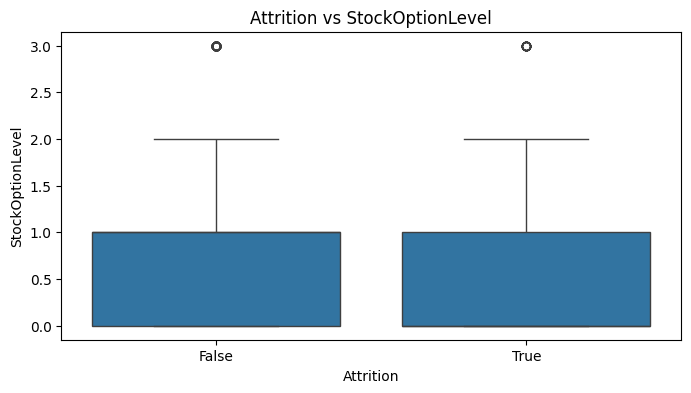

7 Correlation between Attrition and TotalWorkingYears: -0.1711


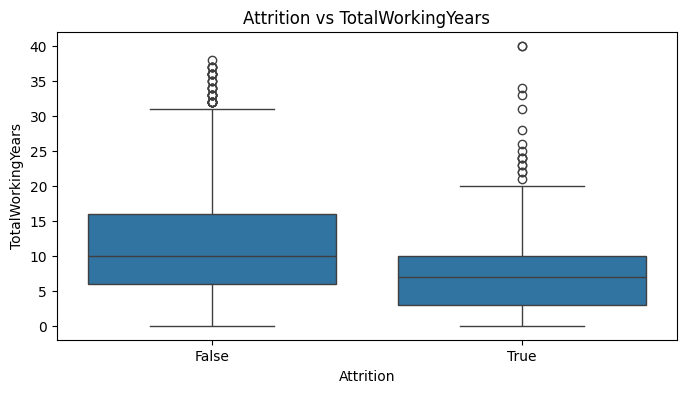

8 Correlation between Attrition and TrainingTimesLastYear: -0.0595


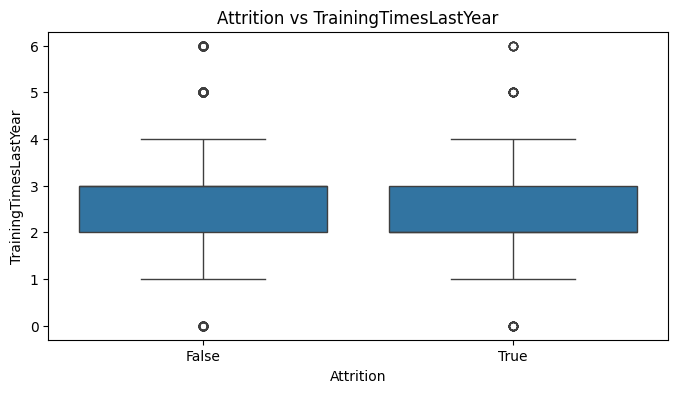

9 Correlation between Attrition and YearsAtCompany: -0.1344


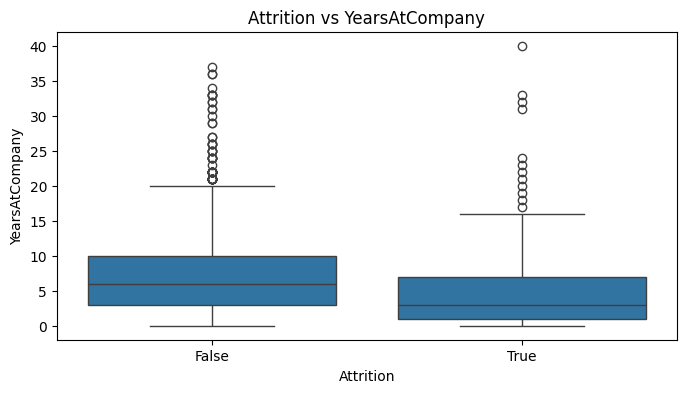

10 Correlation between Attrition and YearsInCurrentRole: -0.1605


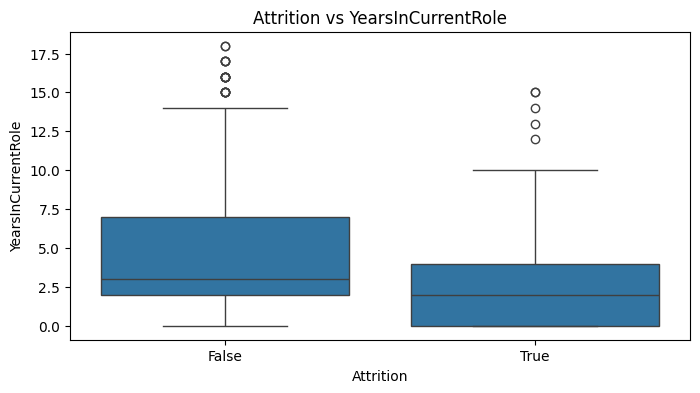

11 Correlation between Attrition and YearsSinceLastPromotion: -0.0330


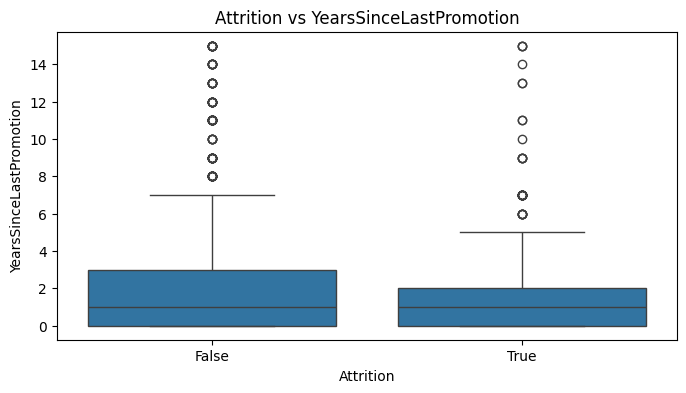

12 Correlation between Attrition and YearsWithCurrManager: -0.1562


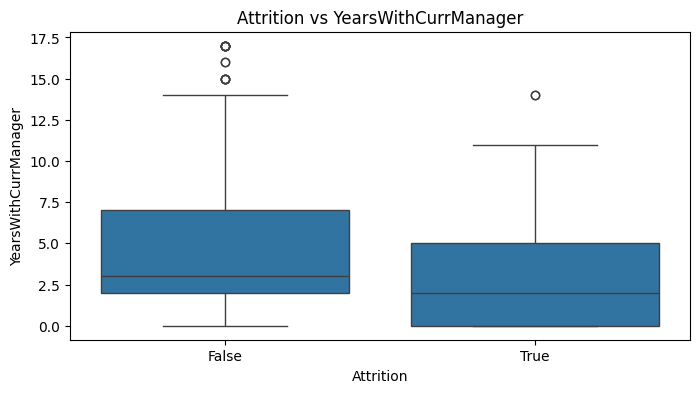

In [49]:
for i,column in enumerate(quantitative_features):
    correlation = df1['Attrition_Bool'].corr(df1[column])
    # Print correlation coefficient
    print(f"{i+1} Correlation between Attrition and {column}: {correlation:.4f}")
    plt.figure(figsize=(8, 4))
    # sns.violinplot(x='Attrition', y=column, data=df1)
    sns.boxplot(x='Attrition_Bool', y=column, data=df1)
    plt.title(f'Attrition vs {column}')
    plt.xlabel('Attrition')
    plt.ylabel(column)
    plt.show()

Features to remove
* YearsSinceLastPromotion, TrainingTimesLastYear, StockOptionLevel, DailyRate

In [56]:
df1.select_dtypes(exclude='object').corr()['Attrition_Bool'].sort_values(ascending=False,key=abs)

Attrition_Bool              1.000000
TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
MonthlyRate                 0.015170
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
Name: Attrition_Bool, dtype: float64

In [65]:
df1[quantitative_features].corrwith(df1['Attrition']).sort_values(key=abs) # ignore the negative sign and sort it

HourlyRate                -0.006846
PercentSalaryHike         -0.013478
MonthlyRate                0.015170
YearsSinceLastPromotion   -0.033019
NumCompaniesWorked         0.043494
DailyRate                 -0.056652
TrainingTimesLastYear     -0.059478
DistanceFromHome           0.077924
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
TotalWorkingYears         -0.171063
dtype: float64

In [68]:
quantitative_features_new=['Age','DistanceFromHome', 'MonthlyIncome','StockOptionLevel', 'TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

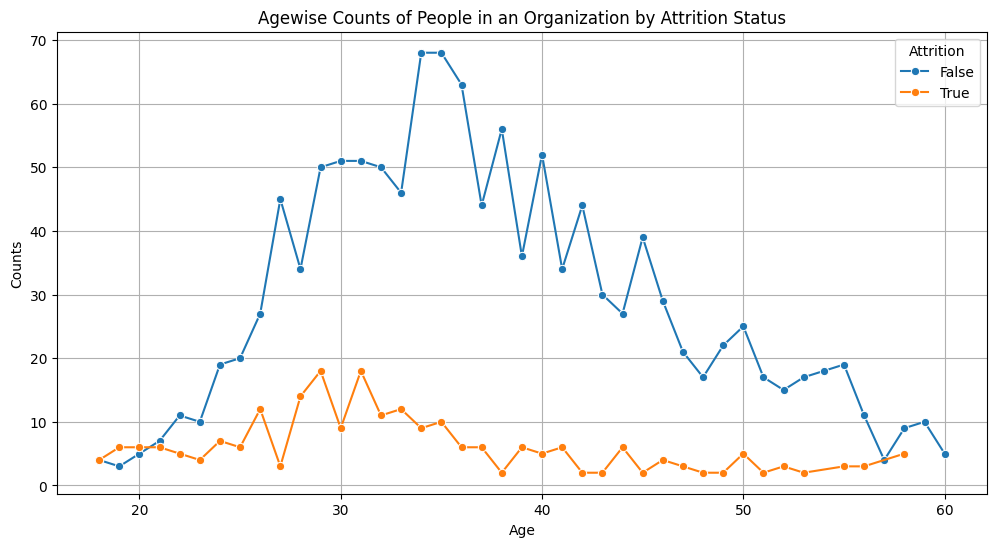

In [18]:
age_att = df1.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')

# Plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(data=age_att, x='Age', y='Counts', hue='Attrition', marker='o')

# Customize labels and title
plt.title('Agewise Counts of People in an Organization by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(True)  # Add grid for better readability

# Show plot
plt.legend(title='Attrition', loc='upper right')
plt.show()

In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
df1[quantitative_features].corrwith(df1['Attrition']).sort_values()

TotalWorkingYears         -0.171063
YearsInCurrentRole        -0.160545
MonthlyIncome             -0.159840
Age                       -0.159205
YearsWithCurrManager      -0.156199
StockOptionLevel          -0.137145
YearsAtCompany            -0.134392
TrainingTimesLastYear     -0.059478
DailyRate                 -0.056652
YearsSinceLastPromotion   -0.033019
PercentSalaryHike         -0.013478
HourlyRate                -0.006846
MonthlyRate                0.015170
NumCompaniesWorked         0.043494
DistanceFromHome           0.077924
dtype: float64

In [21]:
# Remove 'Attrition' from qualitative_features list
qualitative_features.remove('Attrition')

In [22]:
# # Plot individual count plots
# for feature in qualitative_features:
#     plt.figure(figsize=(8, 4))
#     sns.swarmplot(x=feature, hue='Attrition', data=df1)
#     plt.title(f'Attrition by {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.legend(title='Attrition', loc='upper right',  bbox_to_anchor=(1.05, 1))
#     plt.tight_layout()  # Adjust layout to prevent clipping of the legend
#     plt.show()

In [37]:
# # Plot individual normalized count plots with percentages
# for feature in qualitative_features:
#     plt.figure(figsize=(8, 4))
#     # Calculate normalized counts
#     normalized_counts = df1.groupby(feature)['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
#     # Plot normalized count plot
#     sns.barplot(x=feature, y='Percentage', hue='Attrition', data=normalized_counts)
#     plt.title(f'Normalized Attrition by {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Percentage')
#     plt.xticks(rotation=45)
#     plt.legend(title='Attrition', loc='upper right')
#     plt.show()

### Chi-Squared Test for Qualitative Features

Chi-Squared Test for BusinessTravel:
Chi2 Stat: 24.182413685655174, P-value: 5.608614476449931e-06, Degrees of Freedom: 2
Expected Frequencies:
[[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]




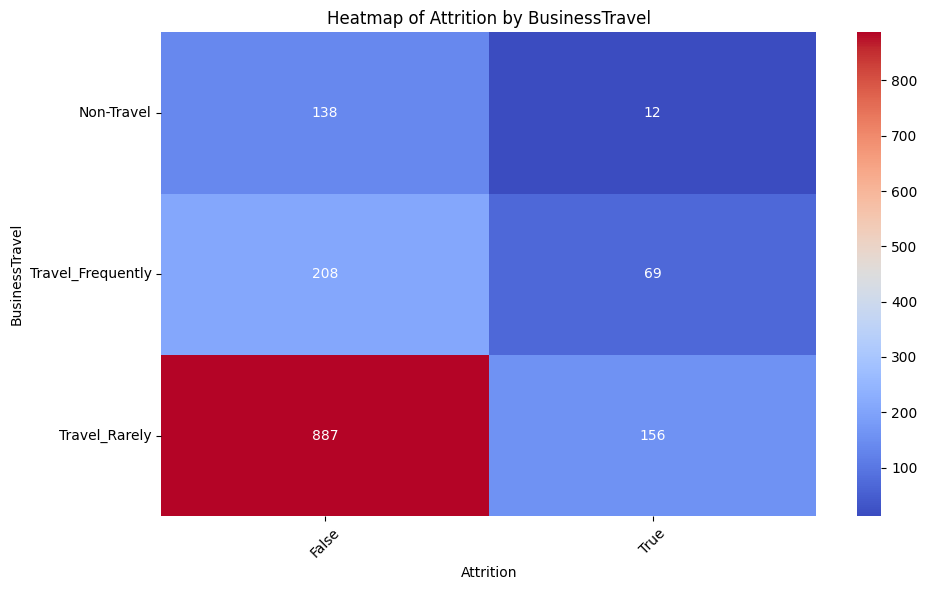

Chi-Squared Test for Department:
Chi2 Stat: 10.79600732241067, P-value: 0.004525606574479634, Degrees of Freedom: 2
Expected Frequencies:
[[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]




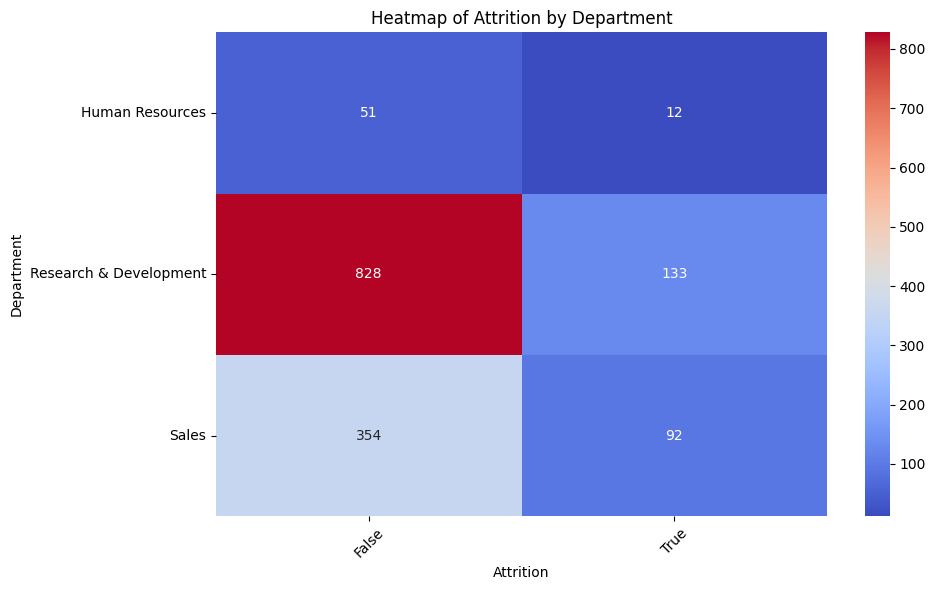

Chi-Squared Test for EducationField:
Chi2 Stat: 16.024674119585427, P-value: 0.006773980139025213, Degrees of Freedom: 5
Expected Frequencies:
[[ 22.64693878   4.35306122]
 [508.29795918  97.70204082]
 [133.36530612  25.63469388]
 [389.19183673  74.80816327]
 [ 68.77959184  13.22040816]
 [110.71836735  21.28163265]]




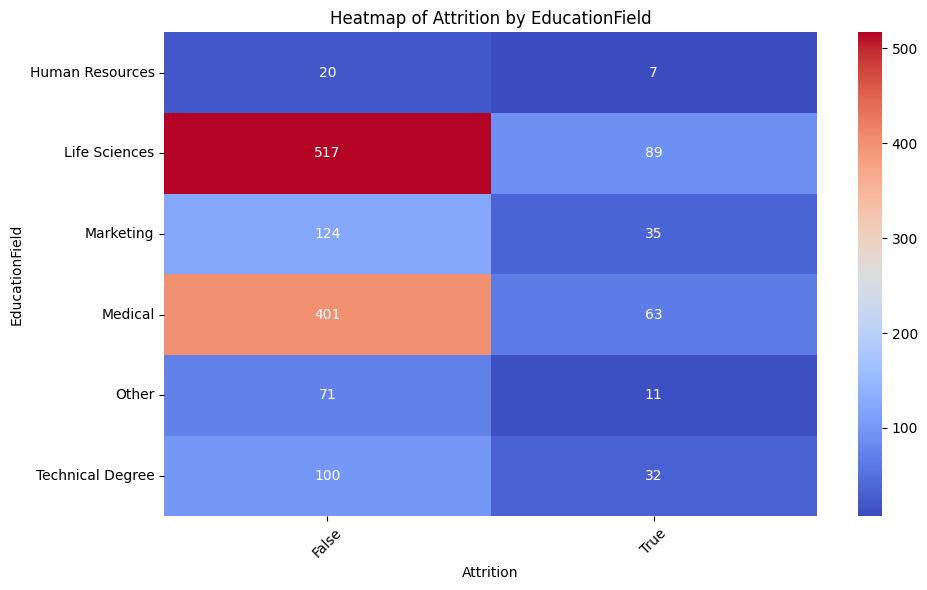

Chi-Squared Test for Gender:
Chi2 Stat: 1.1169671241970975, P-value: 0.29057244902890855, Degrees of Freedom: 1
Expected Frequencies:
[[493.2  94.8]
 [739.8 142.2]]




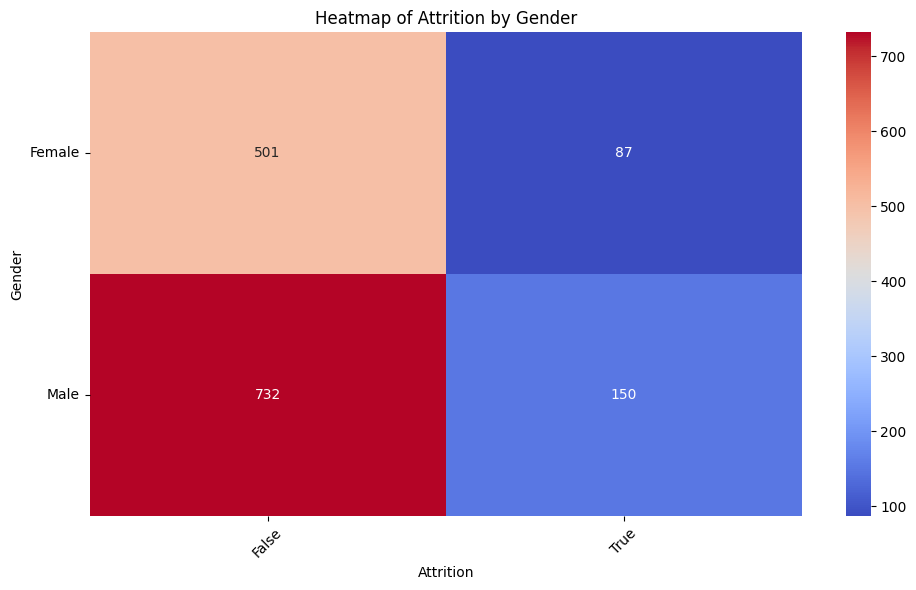

Chi-Squared Test for EnvironmentSatisfaction:
Chi2 Stat: 22.503881435842295, P-value: 5.1234689062894205e-05, Degrees of Freedom: 3
Expected Frequencies:
[[238.2122449   45.7877551 ]
 [240.72857143  46.27142857]
 [379.96530612  73.03469388]
 [374.09387755  71.90612245]]




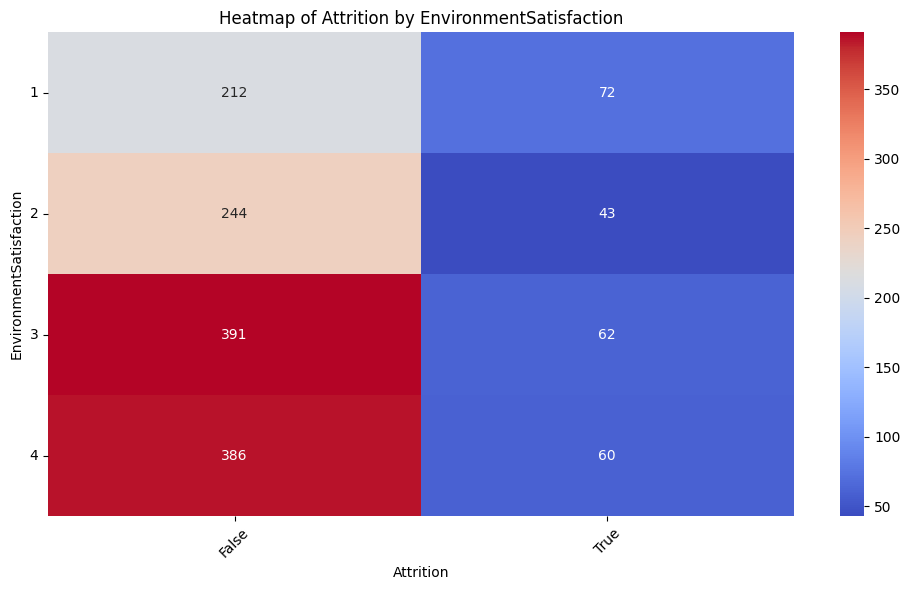

Chi-Squared Test for Education:
Chi2 Stat: 3.0739613982367193, P-value: 0.5455253376565949, Degrees of Freedom: 4
Expected Frequencies:
[[142.59183673  27.40816327]
 [236.53469388  45.46530612]
 [479.77959184  92.22040816]
 [333.83265306  64.16734694]
 [ 40.26122449   7.73877551]]




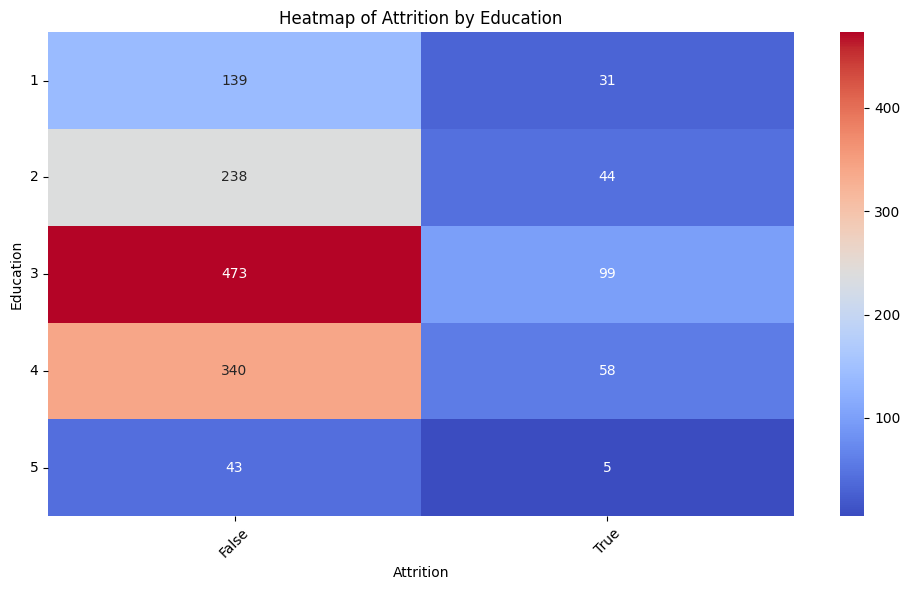

Chi-Squared Test for JobSatisfaction:
Chi2 Stat: 17.505077010348, P-value: 0.0005563004510387556, Degrees of Freedom: 3
Expected Frequencies:
[[242.40612245  46.59387755]
 [234.85714286  45.14285714]
 [370.73877551  71.26122449]
 [384.99795918  74.00204082]]




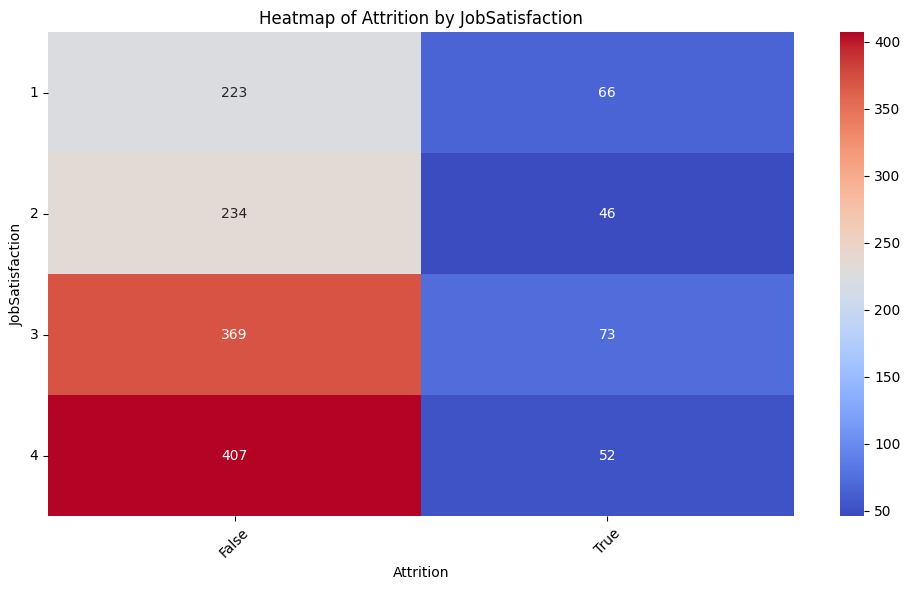

Chi-Squared Test for JobInvolvement:
Chi2 Stat: 28.492021234659283, P-value: 2.8631806367134195e-06, Degrees of Freedom: 3
Expected Frequencies:
[[ 69.61836735  13.38163265]
 [314.54081633  60.45918367]
 [728.05714286 139.94285714]
 [120.78367347  23.21632653]]




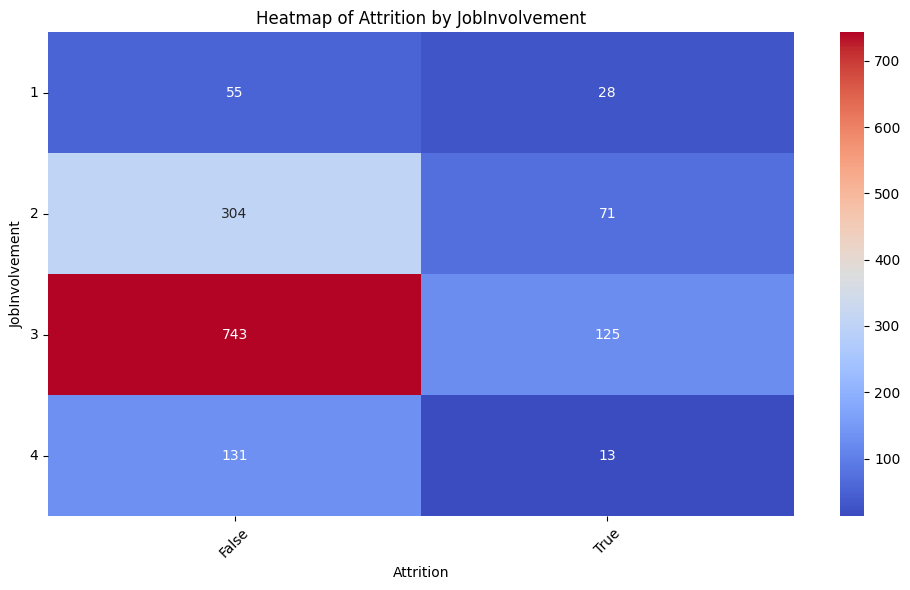

Chi-Squared Test for JobLevel:
Chi2 Stat: 72.5290131066739, P-value: 6.634684715458957e-15, Degrees of Freedom: 4
Expected Frequencies:
[[455.45510204  87.54489796]
 [447.90612245  86.09387755]
 [182.85306122  35.14693878]
 [ 88.91020408  17.08979592]
 [ 57.8755102   11.1244898 ]]




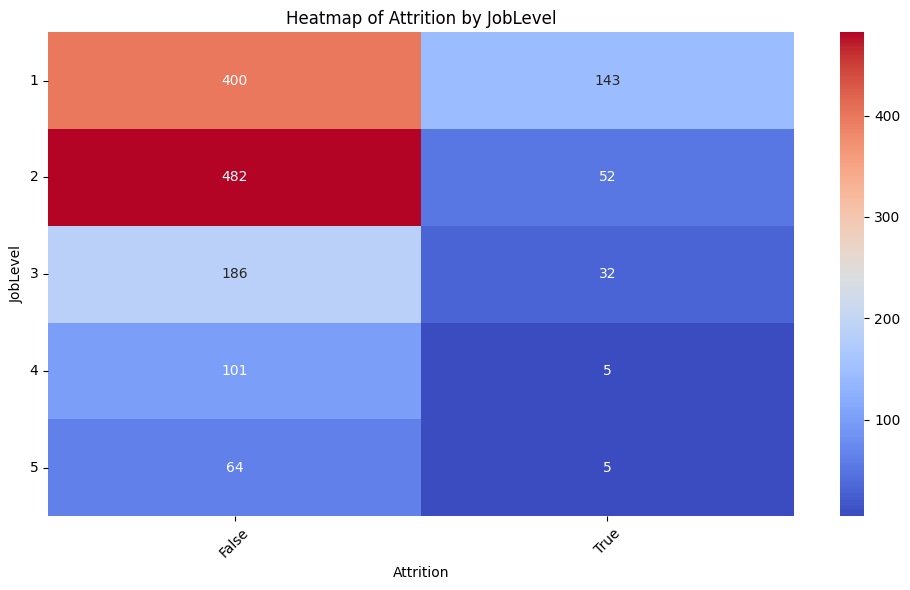

Chi-Squared Test for JobRole:
Chi2 Stat: 86.19025367670434, P-value: 2.7524816380506567e-15, Degrees of Freedom: 8
Expected Frequencies:
[[109.87959184  21.12040816]
 [ 43.61632653   8.38367347]
 [217.24285714  41.75714286]
 [ 85.55510204  16.44489796]
 [121.62244898  23.37755102]
 [ 67.10204082  12.89795918]
 [244.92244898  47.07755102]
 [273.44081633  52.55918367]
 [ 69.61836735  13.38163265]]




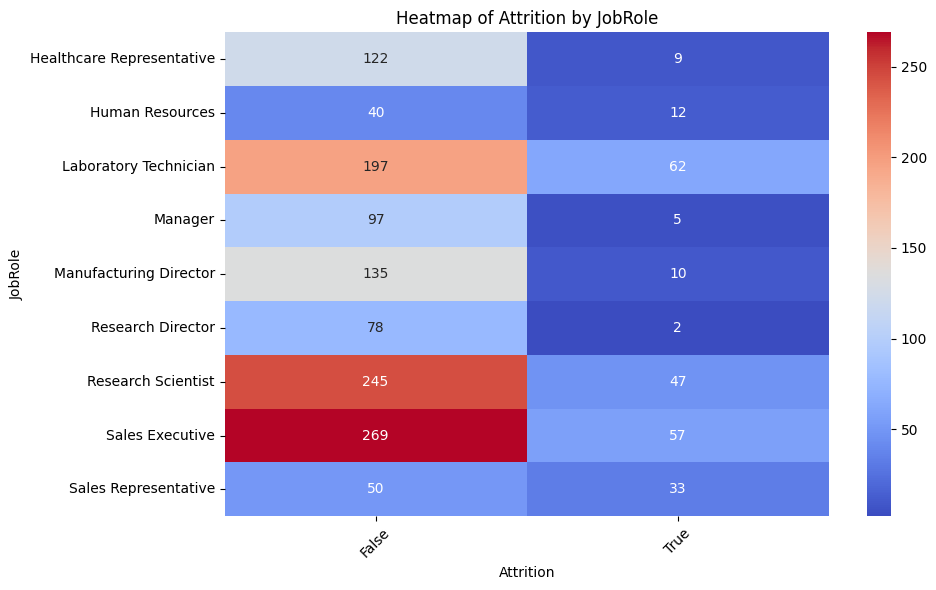

Chi-Squared Test for MaritalStatus:
Chi2 Stat: 46.163676540848705, P-value: 9.455511060340833e-11, Degrees of Freedom: 2
Expected Frequencies:
[[274.27959184  52.72040816]
 [564.49591837 108.50408163]
 [394.2244898   75.7755102 ]]




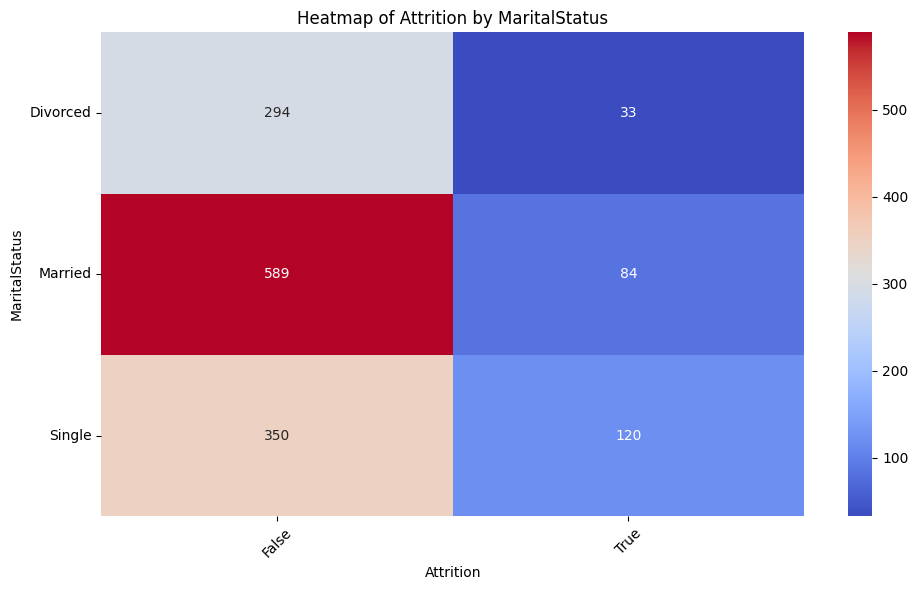

Chi-Squared Test for OverTime:
Chi2 Stat: 87.56429365828768, P-value: 8.158423721538322e-21, Degrees of Freedom: 1
Expected Frequencies:
[[884.06938776 169.93061224]
 [348.93061224  67.06938776]]




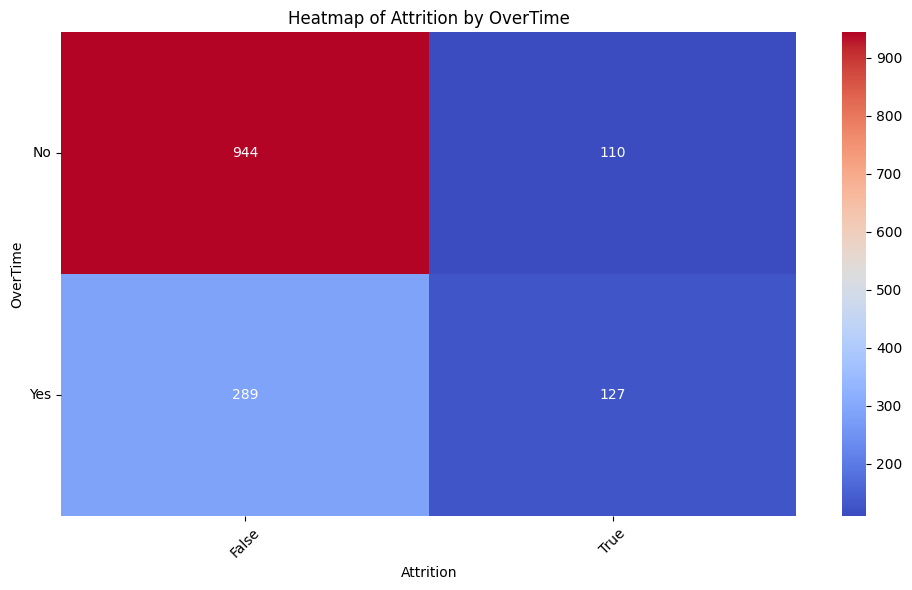

Chi-Squared Test for WorkLifeBalance:
Chi2 Stat: 16.3250970916474, P-value: 0.0009725698845348822, Degrees of Freedom: 3
Expected Frequencies:
[[ 67.10204082  12.89795918]
 [288.53877551  55.46122449]
 [749.02653061 143.97346939]
 [128.33265306  24.66734694]]




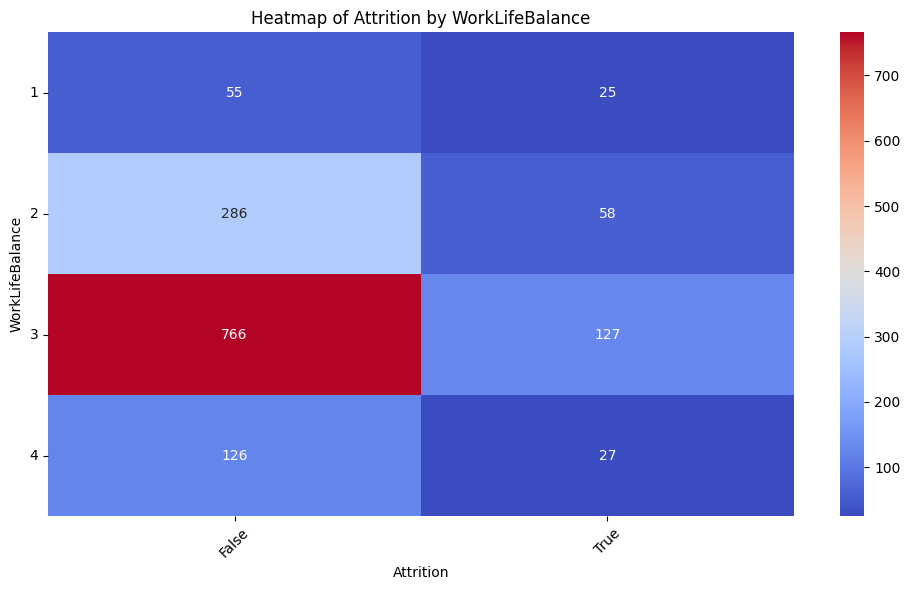

Chi-Squared Test for PerformanceRating:
Chi2 Stat: 0.00015475439428271534, P-value: 0.9900745465934576, Degrees of Freedom: 1
Expected Frequencies:
[[1043.43673469  200.56326531]
 [ 189.56326531   36.43673469]]




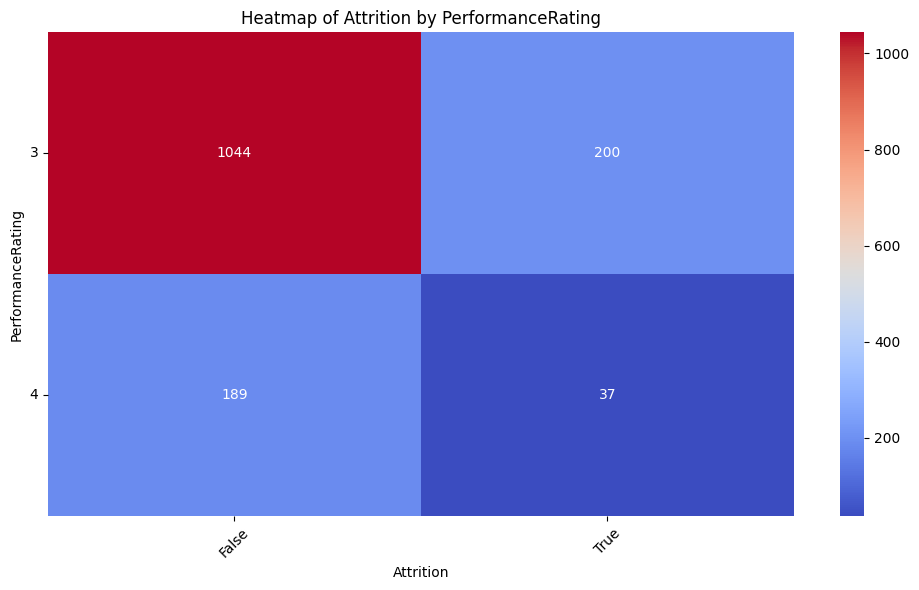

Chi-Squared Test for RelationshipSatisfaction:
Chi2 Stat: 5.241067859713709, P-value: 0.15497244371052638, Degrees of Freedom: 3
Expected Frequencies:
[[231.50204082  44.49795918]
 [254.14897959  48.85102041]
 [384.99795918  74.00204082]
 [362.35102041  69.64897959]]




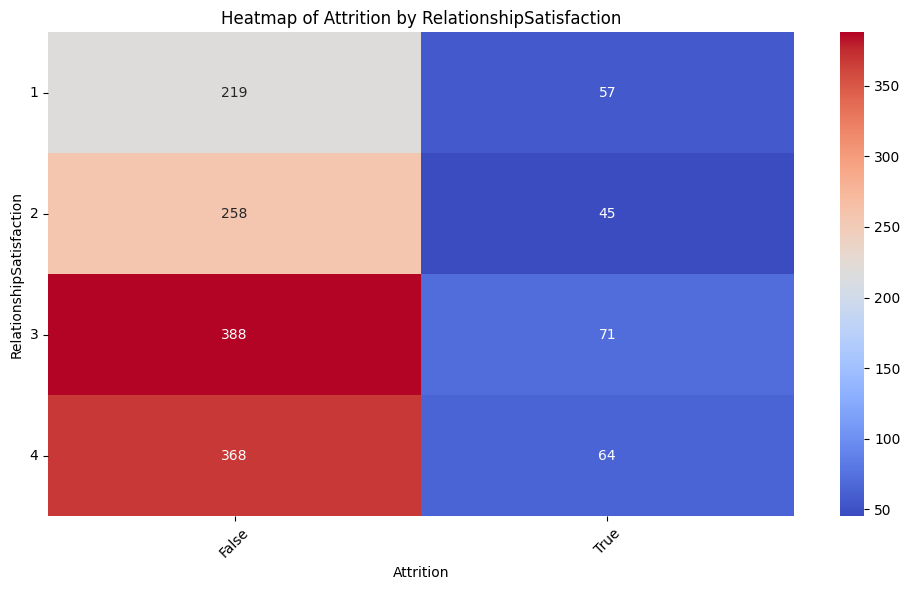

In [38]:
from scipy.stats import chi2_contingency

# Perform chi-squared test
for feature in qualitative_features:
    contingency_table = pd.crosstab(df1[feature], df1['Attrition'])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-Squared Test for {feature}:')
    print(f'Chi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}')
    print('Expected Frequencies:')
    print(ex)
    print('\n')
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Heatmap of Attrition by {feature}')
    plt.xlabel('Attrition')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [25]:
features_to_remove=['RelationshipSatisfaction','PerformanceRating','Education','Gender']

## Logistic Regression to Identify Important Features

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = df1.drop('Attrition', axis=1)
y = df1['Attrition']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[374   6]
 [ 51  10]]
              precision    recall  f1-score   support

       False       0.88      0.98      0.93       380
        True       0.62      0.16      0.26        61

    accuracy                           0.87       441
   macro avg       0.75      0.57      0.59       441
weighted avg       0.84      0.87      0.84       441



In [27]:
X =df1[['Age', 'DailyRate',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike','StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [28]:
y = df1['Attrition']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(C=1000, max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[374   6]
 [ 57   4]]
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       380
        True       0.40      0.07      0.11        61

    accuracy                           0.86       441
   macro avg       0.63      0.52      0.52       441
weighted avg       0.80      0.86      0.81       441

